In [1]:
%matplotlib widget

from lib import secrets
from twelvedata import TDClient

td = TDClient(apikey=secrets.twelvedata_api_key)
ts = td.time_series(
    symbol="AAPL",
    interval="1min",
    outputsize=10,
    timezone="America/New_York",
)

ohlc_df = ts.as_pandas()
ohlc_df

,open,high,low,close,volume
datetime,,,,,
2021-06-16 13:59:00,130.36000,130.42000,130.35500,130.39000,78876
2021-06-16 13:58:00,130.37000,130.42000,130.35001,130.36000,169764
2021-06-16 13:57:00,130.31920,130.39999,130.31000,130.37000,87120
2021-06-16 13:56:00,130.36749,130.37000,130.30310,130.31090,88411
2021-06-16 13:55:00,130.38000,130.39999,130.36000,130.36000,55058
2021-06-16 13:54:00,130.30499,130.39999,130.28500,130.38000,97715
2021-06-16 13:53:00,130.30499,130.31500,130.28000,130.30499,72254
2021-06-16 13:52:00,130.25000,130.32001,130.25000,130.31000,124501
2021-06-16 13:51:00,130.19000,130.26770,130.19000,130.24809,90861


In [2]:
ts.as_csv()

(['datetime', 'open', 'high', 'low', 'close', 'volume'],
 ['2021-06-16 13:59:00',
  '130.36000',
  '130.42000',
  '130.35500',
  '130.39000',
  '78876'],
 ['2021-06-16 13:58:00',
  '130.37000',
  '130.42000',
  '130.35001',
  '130.36000',
  '169764'],
 ['2021-06-16 13:57:00',
  '130.31920',
  '130.39999',
  '130.31000',
  '130.37000',
  '87120'],
 ['2021-06-16 13:56:00',
  '130.36749',
  '130.37000',
  '130.30310',
  '130.31090',
  '88411'],
 ['2021-06-16 13:55:00',
  '130.38000',
  '130.39999',
  '130.36000',
  '130.36000',
  '55058'],
 ['2021-06-16 13:54:00',
  '130.30499',
  '130.39999',
  '130.28500',
  '130.38000',
  '97715'],
 ['2021-06-16 13:53:00',
  '130.30499',
  '130.31500',
  '130.28000',
  '130.30499',
  '72254'],
 ['2021-06-16 13:52:00',
  '130.25000',
  '130.32001',
  '130.25000',
  '130.31000',
  '124501'],
 ['2021-06-16 13:51:00',
  '130.19000',
  '130.26770',
  '130.19000',
  '130.24809',
  '90861'],
 ['2021-06-16 13:50:00',
  '130.24001',
  '130.25999',
  '130.17999'

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

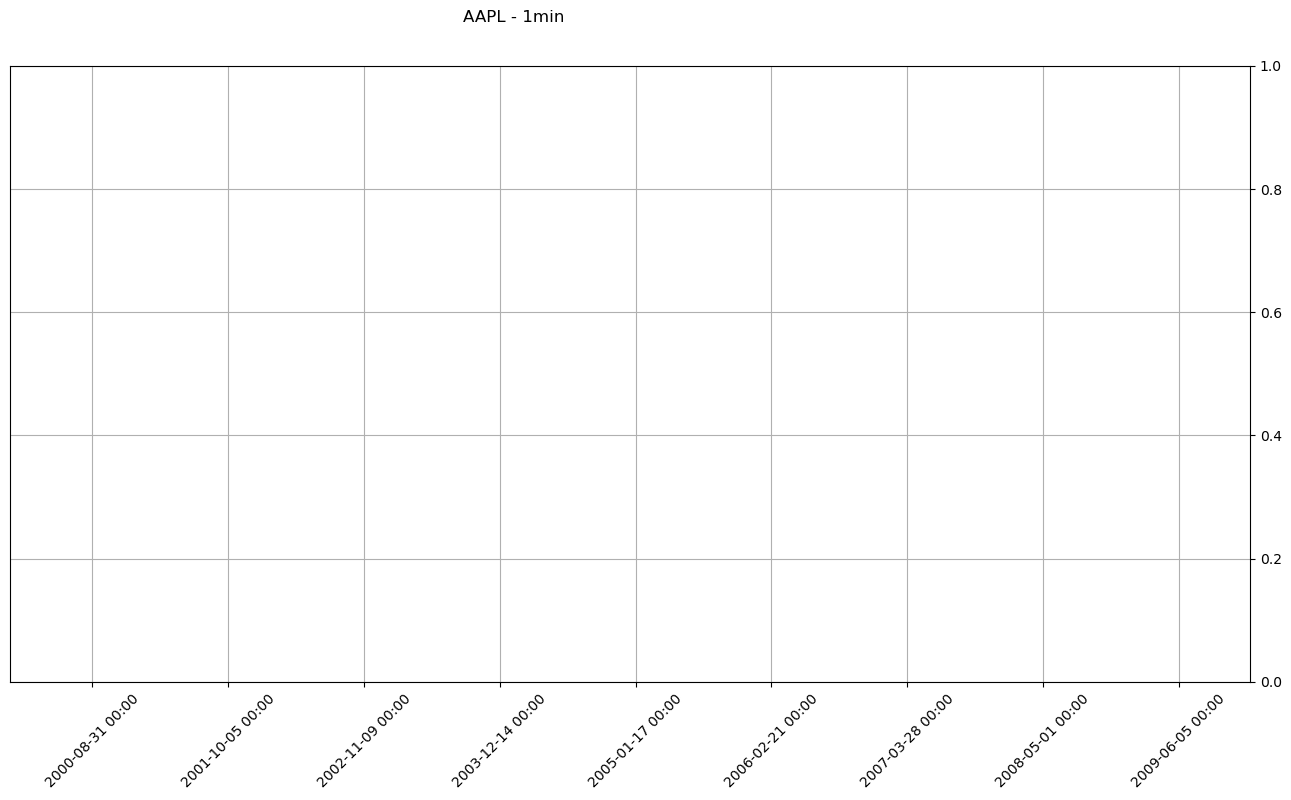

In [3]:
ts.as_pyplot_figure()

In [4]:
import pandas as pd

example_data = pd.read_csv(f'test_senate.csv', header=None, sep=',')

example_data

,0,1,2,3,4,5
0,INTC,6/6/2021,"Whitehouse, Sheldon",Sale,"$15,001 - $50,000",D
1,CMG,6/3/2021,"Hickenlooper, John",Sale,"$100,001 - $250,000",NaN
2,PTON,6/3/2021,"Hickenlooper, John",Purchase,"$1,001 - $15,000",NaN
3,TTD,6/3/2021,"Hickenlooper, John",Purchase,"$15,001 - $50,000",NaN
4,QRTEA,6/3/2021,"Hickenlooper, John",Sale,"$100,001 - $250,000",NaN
...,...,...,...,...,...,...
75,VIAC,5/2/2021,"Perdue, David",Purchase,"$1,001 - $15,000",R
76,T,5/2/2021,"Perdue, David",Sale,"$15,001 - $50,000",R
77,DAL,5/2/2021,"Perdue, David",Purchase,"$1,001 - $15,000",R
78,DD,5/2/2021,"Perdue, David",Purchase,"$1,001 - $15,000",R


In [5]:
example_data[(example_data[2] == 'Hickenlooper, John')]

,0,1,2,3,4,5
1,CMG,6/3/2021,"Hickenlooper, John",Sale,"$100,001 - $250,000",NaN
2,PTON,6/3/2021,"Hickenlooper, John",Purchase,"$1,001 - $15,000",NaN
3,TTD,6/3/2021,"Hickenlooper, John",Purchase,"$15,001 - $50,000",NaN
4,QRTEA,6/3/2021,"Hickenlooper, John",Sale,"$100,001 - $250,000",NaN


In [6]:
ohlc_df['volume'].plot.bar()

In [7]:
[
    method_name
    for method_name in dir(ohlc_df.plot)
    if not method_name.startswith("_")
]

['area',
 'bar',
 'barh',
 'box',
 'density',
 'hexbin',
 'hist',
 'kde',
 'line',
 'pie',
 'scatter']

In [8]:
import mplfinance as mpf

ohlc_df_by_date = ohlc_df.sort_values(by='datetime')
mpf.plot(ohlc_df_by_date, type='candle', style='yahoo', volume=True)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [19]:
n = td.time_series(
    symbol="AAPL",
    interval="1week",
    outputsize=50,
    timezone="America/New_York",
    order="asc"
)
ohlc_df = n.as_pandas()
mpf.plot(ohlc_df, type='candle', style='yahoo', volume=True)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

ohlc_df